/opt/conda/lib/python3.11/site-packages/equinox/_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)
|██████████| 100.0% ◆ elapsed 31.67ms ◆ remaining 0.00ms
100%|██████████| 100/100 [00:07<00:00, 13.56it/s]


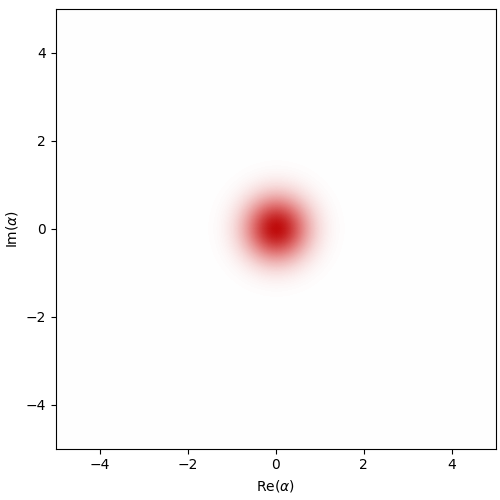

In [4]:

import dynamiqs as dq
import numpy as np
import scipy as sp
import jax
import jax.numpy as jnp 
from matplotlib import pyplot as plt
na = 10
nb = 10
a,b = dq.destroy(na,nb)

GHz = 1.0
MHz = 1e-3 * GHz
kHz = 1e-3 * MHz

#Paraemers
ω_a0 = 5.26 *GHz
ω_b0 = 7.70 *GHz
φ_a = 0.06
φ_b = 0.29
Ka = 9.3 *kHz
Kb = 10 
E_J = 42.76 * GHz
ΔE_J = 0.47 * GHz
ω_d = 7.623 * GHz
ω_p = 2.891 * GHz
ϵ_d = -2*3.815 
ϵ_p = 0.122

T = 3e-2
t_save = jnp.linspace(0, T, 100) 

#Equations
phi_hat = φ_a * (a + dq.dag(a)) + φ_b * (b + dq.dag(b))
H_0 = ω_a0* dq.dag(a) @ a + ω_b0* dq.dag(b) @ b 
H_ATS = dq.modulated(lambda t: -2* E_J*(jnp.sin(ϵ_p * jnp.cos(ω_d * t))), dq.sinm(phi_hat)) + dq.modulated(lambda t : 2 * ΔE_J * jnp.cos(ϵ_p * jnp.cos(ω_d * t)), dq.cosm(phi_hat))
H_d = dq.modulated(lambda t: 2 * ϵ_d * jnp.cos(ω_d * t), (b + dq.dag(b)))
H = H_0 + H_ATS + H_d 

psi0 = dq.fock((na,nb), (0,0)) 
res = dq.mesolve(H, [jnp.sqrt(Kb)*b], psi0, t_save)
trace_a = dq.ptrace(res.states, 0,res.states.dims) 
dq.plot.wigner_gif(trace_a, fps=60)